<ipython-input-1-b9c7aebd3f8d>:24: RuntimeWarning: overflow encountered in exp
  z1 = np.log(1 + np.exp(-z))
<ipython-input-1-b9c7aebd3f8d>:25: RuntimeWarning: overflow encountered in exp
  z2 = np.log(1 + np.exp(z))


Streaming output truncated to the last 5000 lines.
32126 0.0019296864304184339
32127 0.004506984018298716
32128 0.0020783075008282514
32129 0.0026053985426112885
32130 0.003610390526888512
32131 0.001904055351195822
32132 0.00429344296330843
32133 0.002021469059273698
32134 0.0051439586701819435
32135 0.002183222150877808
32136 0.0028107304807663594
32137 0.003987784153572697
32138 0.001973809985573186
32139 0.004841437910811478
32140 0.0021375436529460228
32141 0.0027228882059882275
32142 0.0038169910636739334
32143 0.0019323504208443977
32144 0.004516988961707965
32145 0.002055131017181467
32146 0.0025535730381346104
32147 0.0035149615102069774
32148 0.0018868342574093933
32149 0.004193462341859224
32150 0.0020047656986586265
32151 0.00506720407768627
32152 0.0021753567504929627
32153 0.0027953701781754593
32154 0.003939489776879813
32155 0.0019466670756372114
32156 0.004630296354201932
32157 0.0020683509058482706
32158 0.002578814621504039
32159 0.003555546853562137
32160 0.00188782

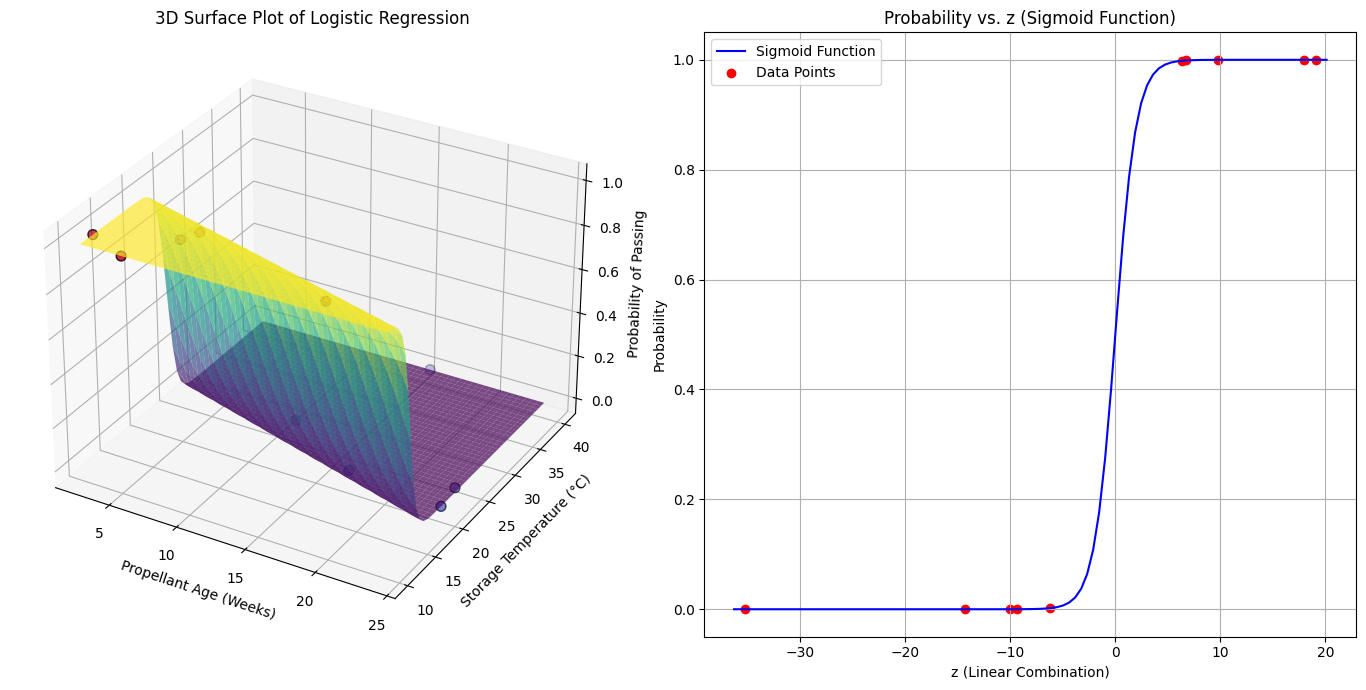

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Input data
x_in = np.array([[15.5, 40],
                 [23.75, 23.25],
                 [8, 17],
                 [17, 21],
                 [5.5, 10],
                 [19, 12],
                 [24, 20],
                 [2.5, 12],
                 [7.5, 15],
                 [11, 26]])

y_in = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=np.int8)
y1_in = 1 - y_in
nx = x_in.shape[0]

# Objective function
def objective_function(w):
    z = w[0] + w[1] * x_in[:, 0] + w[2] * x_in[:, 1]
    z1 = np.log(1 + np.exp(-z))
    z2 = np.log(1 + np.exp(z))
    return np.dot(y_in, z1) + np.dot(y1_in, z2)

# Gradient function
def gradient_function(w):
    hi = 1 / (1 + np.exp(-(w[0] + w[1] * x_in[:, 0] + w[2] * x_in[:, 1])))
    yh = hi - y_in
    return np.array([np.sum(yh), np.sum(yh * x_in[:, 0]), np.sum(yh * x_in[:, 1])])

# Line search function
def line_search(objective_function, gradient, x):
    beta = 0.1
    stepsize = 1
    trial = 100
    tau = 0.5
    for i in range(trial):
        fx1 = objective_function(x)
        fx2 = objective_function(x - stepsize * gradient)
        c = -beta * stepsize * np.dot(gradient, gradient)
        if fx2 - fx1 <= c:
            break
        else:
            stepsize = tau * stepsize
    return stepsize

# Gradient descent parameters
maxit = 1000000
epsilon = 1.e-3

# Initial weights
w = np.array([-2, 3, 1])  # Added a third value to the weight vector
for i in range(maxit):
    gradient = gradient_function(w)
    b = np.linalg.norm(gradient)
    if b < epsilon:
        break
    stepsize = line_search(objective_function, gradient, w)
    w = w - stepsize * gradient
    print(i, b)

# Minimum value and location
minimum_value = objective_function(w)
print("Minimum value:", minimum_value)
print("Minimum location:", w)
print("Iteration:", i)

# 3D Plot
fig = plt.figure(figsize=(14, 7))

# 3D Surface Plot
ax = fig.add_subplot(121, projection='3d')
x1_range = np.linspace(x_in[:, 0].min(), x_in[:, 0].max(), 50)
x2_range = np.linspace(x_in[:, 1].min(), x_in[:, 1].max(), 50)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = -w[0] - w[1] * X1 - w[2] * X2
probability = 1 / (1 + np.exp(Z))

ax.plot_surface(X1, X2, probability, cmap='viridis', alpha=0.7)
ax.scatter(x_in[:, 0], x_in[:, 1], 1 / (1 + np.exp(-(w[0] + w[1] * x_in[:, 0] + w[2] * x_in[:, 1]))),
           c=y_in, cmap='coolwarm', edgecolors='k', s=50, label='Data Points')
ax.set_xlabel('Propellant Age (Weeks)')
ax.set_ylabel('Storage Temperature (°C)')
ax.set_zlabel('Probability of Passing')
ax.set_title('3D Surface Plot of Logistic Regression')

# Probability vs. z Plot
ax2 = fig.add_subplot(122)

# Compute z values and probabilities for each data point
z_values = w[0] + w[1] * x_in[:, 0] + w[2] * x_in[:, 1]
probabilities = 1 / (1 + np.exp(-z_values))

# Define a range of z values for plotting
z_range = np.linspace(z_values.min() - 1, z_values.max() + 1, 100)
prob_range = 1 / (1 + np.exp(-z_range))

# Plot
ax2.plot(z_range, prob_range, color='blue', label='Sigmoid Function')
ax2.scatter(z_values, probabilities, color='red', label='Data Points')
ax2.set_xlabel('z (Linear Combination)')
ax2.set_ylabel('Probability')
ax2.set_title('Probability vs. z (Sigmoid Function)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()